In [1]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [2]:
%pip install ultralytics

import torch
from matplotlib import pyplot as plt
import numpy as np
import os

Note: you may need to restart the kernel to use updated packages.


Training Model

In [35]:
!cd yolov5 && python train.py --img 640 --batch-size 32 --epochs 150 --data dataset.yaml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=100, batch_size=32, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-312-g1bcd17ee Python-3.9.6 torch-2.2.1+cu118 CUDA:0 (NVIDIA GeForce GTX 1660, 6144MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_

Load Custom Model

In [51]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp11/weights/best.pt')

Using cache found in C:\Users\User/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-3-15 Python-3.9.6 torch-2.2.1+cu118 CUDA:0 (NVIDIA GeForce GTX 1660, 6144MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


Results for a image

In [52]:
img = os.path.join('data', 'xd.jpg')
results = model(img)
results.print()

image 1/1: 1046x591 1 blue
Speed: 7.0ms pre-process, 8.0ms inference, 5.0ms NMS per image at shape (1, 3, 640, 384)


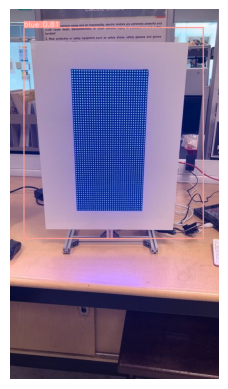

In [53]:
plt.imshow(np.squeeze(results.render()))
plt.axis('off')
plt.show()

Results for a video

In [55]:
!cd yolov5 && python detect.py --weights runs/train/exp11/weights/best.pt --img 640 --conf 0.55 --source ../rgb_1.mp4

detect: weights=['runs/train/exp11/weights/best.pt'], source=../rgb_1.mp4, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.55, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-312-g1bcd17ee Python-3.9.6 torch-2.2.1+cu118 CUDA:0 (NVIDIA GeForce GTX 1660, 6144MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/308) C:\Users\User\Desktop\test\rgb_1.mp4: 640x384 1 black, 40.4ms
video 1/1 (2/308) C:\Users\User\Desktop\test\rgb_1.mp4: 640x384 1 black, 8.0ms
video 1/1 (3/308) C:\Users\User\Desktop\test\rgb_1.mp4: 640x384 1 black, 8.0ms
video 1/1 (4/308) C:\Users\User\Desktop\test\rgb_1.mp4: 640x384 1 red, 9.0ms
video 1/